In [222]:
# !pip install geopy
import warnings

warnings.filterwarnings("ignore")
import dateutil

# Data Preparation

In [196]:
import pandas as pd
from geopy.geocoders import Nominatim

In [14]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

def reverse_geocode(lat, lon):
    try:
        geolocator = Nominatim(user_agent="YourUniqueUserAgentName")
        # Increase the timeout parameter
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=5)
        if location is not None:
            address = location.raw['address']
            city = address.get('city', '')
            state = address.get('state', '')
            country = address.get('country', '')
            return city, state, country
        else:
            return "", "", ""
    except GeocoderTimedOut:
        return "Timed out", "", ""



# Load your dataset
file_path = rRestaurant Lat Long.csv"
data = pd.read_csv(file_path)

# Add columns for city, state, country
data['city'] = ''
data['state'] = ''
data['country'] = ''

# Iterate over the DataFrame rows
for index, row in data.iterrows():
    city, state, country = reverse_geocode(row['Restaurant_latitude'], row['Restaurant_longitude'])
    data.at[index, 'city'] = city
    data.at[index, 'state'] = state
    data.at[index, 'country'] = country
    
    # To avoid hitting rate limits
    time.sleep(1)

# Save the enriched DataFrame
data.to_csv('Enriched_Restaurant_Lat_Long.csv', index=False)

In [197]:
data_restaurant=pd.read_csv('Enriched_Restaurant_Lat_Long.csv')

In [198]:
data_restaurant.rename(columns={'city':'restaurant_city','state':'restaurant_state','country':'restaurant_country'},inplace=True)

In [18]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

def reverse_geocode(lat, lon):
    try:
        geolocator = Nominatim(user_agent="YourUniqueUserAgentName")
        # Increase the timeout parameter
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=5)
        if location is not None:
            address = location.raw['address']
            city = address.get('city', '')
            state = address.get('state', '')
            country = address.get('country', '')
            return city, state, country
        else:
            return "", "", ""
    except GeocoderTimedOut:
        return "Timed out", "", ""



# Load your dataset
file_path = r"Delivery Lat Long.csv"
data = pd.read_csv(file_path)

# Add columns for city, state, country
data['city'] = ''
data['state'] = ''
data['country'] = ''

# Iterate over the DataFrame rows
for index, row in data.iterrows():
    city, state, country = reverse_geocode(row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    data.at[index, 'city'] = city
    data.at[index, 'state'] = state
    data.at[index, 'country'] = country
    
    # To avoid hitting rate limits
    time.sleep(1)

# Save the enriched DataFrame
data.to_csv('Enriched_Delivery_Lat_Long.csv', index=False)

In [199]:
data_delivery=pd.read_csv('Enriched_Delivery_Lat_Long.csv')

In [200]:
data_delivery.rename(columns={'city':'delivery_city','state':'delivery_state','country':'delivery_country'},inplace=True)

#### Data Manipulation
 - Join with city, state mapping file
 - remove unnecessary columns (ID, Delivery Person ID)
 - Missing value handling 
     - delivery person age
     - delivery person rating
     - Time Ordered
     - Road_traffic_density
     - multiple_deliveries
     - Festival
     - City
     
     41368/45593 on eliminating nan's
 - Data Cleaning
     - Order date format organization to common date format
     - Weatherconditions (remove conditions)
     - Time taken (min elimination)
 - Feature creation
     - Month of order

In [331]:
data_train=pd.read_csv(r"train.csv")

In [875]:
data=data_train.copy()

In [877]:
data=pd.merge(data, data_restaurant,how='inner',on=['Restaurant_latitude','Restaurant_longitude'])
data=pd.merge(data, data_delivery,how='inner',on=['Delivery_location_latitude','Delivery_location_longitude'])

In [879]:
data.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [880]:
data['Delivery_person_Age']=pd.to_numeric(data['Delivery_person_Age'], errors='coerce')
data['Delivery_person_Ratings']=pd.to_numeric(data['Delivery_person_Ratings'], errors='coerce')
data['multiple_deliveries']=pd.to_numeric(data['multiple_deliveries'], errors='coerce')

data=data.apply(lambda col:col.str.strip() if col.dtype=='object' else col)
data=data[(data['Weatherconditions']!='NaN') & (data['Festival']!='NaN') & (data['City']!='NaN') & (data['Time_Orderd']!='NaN') & (data['Time_Order_picked']!='NaN')]
# data.dtypes

In [881]:
data=data[(data['restaurant_country']=='India') & (data['delivery_country']=='India')]

In [882]:
data.drop(['delivery_city','restaurant_city','restaurant_country','restaurant_country','restaurant_state','delivery_country'],axis=1, inplace=True, errors='ignore')

In [883]:
data.dropna(axis=0,inplace=True)

In [884]:
data['Weatherconditions']=data['Weatherconditions'].str[11:]
data['Time_taken(min)']=data['Time_taken(min)'].str[6:]

In [885]:
data['Order_Date']=data['Order_Date'].apply(lambda x:dateutil.parser.parse(x))

In [886]:
data.apply(lambda x: x.unique())

Delivery_person_Age            [37.0, 25.0, 23.0, 26.0, 22.0, 28.0, 36.0, 27....
Delivery_person_Ratings        [4.9, 4.2, 4.1, 4.6, 4.7, 4.8, 4.3, 4.5, 3.9, ...
Restaurant_latitude            [22.745049, 12.913041, 12.914264, 11.003669, 1...
Restaurant_longitude           [75.892471, 77.683237, 77.6784, 76.976494, 80....
Delivery_location_latitude     [22.765049, 22.835049, 22.815049, 22.785049, 2...
Delivery_location_longitude    [75.912471, 75.982471, 75.962471, 75.932471, 7...
Order_Date                     [2022-03-19 00:00:00, 2022-05-04 00:00:00, 202...
Time_Orderd                    [11:30:00, 8:20:00, 10:20:00, 10:40:00, 9:50:0...
Time_Order_picked              [11:45:00, 8:25:00, 10:35:00, 10:45:00, 10:00:...
Weatherconditions                [Sunny, Windy, Fog, Cloudy, Stormy, Sandstorms]
Road_traffic_density                                    [High, Low, Jam, Medium]
Vehicle_condition                                                      [2, 0, 1]
Type_of_order               

In [887]:
# Distance between 2 locations using Haversine distance
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

# Apply the haversine function to each row in the dataframe
data['Distance_km'] = data.apply(lambda row: haversine(row['Restaurant_longitude'], row['Restaurant_latitude'], 
                                                       row['Delivery_location_longitude'], row['Delivery_location_latitude']), axis=1)

In [888]:
# Extracting weekend
data['Weekend']=data['Order_Date'].dt.weekday
weekend=[5,6]
data['Weekend']=data['Weekend'].isin(weekend)

In [890]:
data['Time_taken(min)']=pd.to_numeric(data['Time_taken(min)'])

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

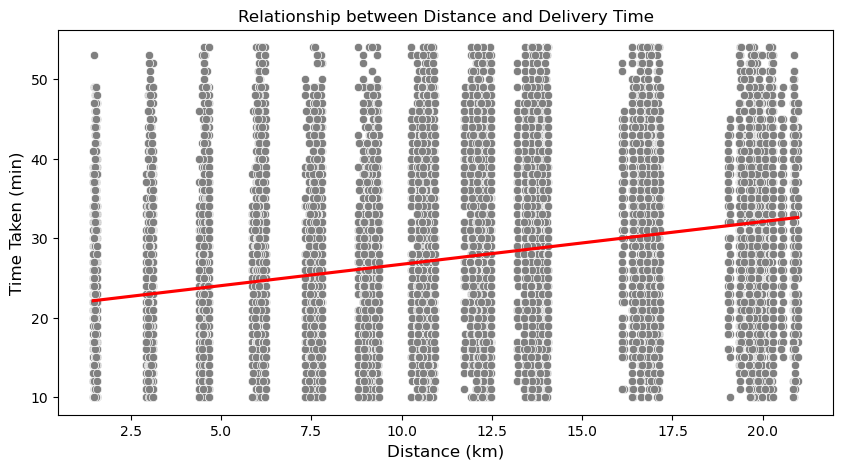

In [891]:
# distance vs delivery time
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Distance_km',y='Time_taken(min)',color='grey')
sns.regplot(data=data,x='Distance_km',y='Time_taken(min)',scatter=False,color='red')

# Enhancing the plot
plt.title('Relationship between Distance and Delivery Time', fontsize=12)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Time Taken (min)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [892]:
def hour_convert(time):
    hour,minn,sec=map(int,time.split(':'))
    return hour
    
data['order_time_hour']=data['Time_Orderd'].apply(hour_convert)
data['order_picked_hour']=data['Time_Order_picked'].apply(hour_convert)

In [893]:
data.to_csv('del.csv')

In [894]:
def convert_to_num(time):
    hour,minn,sec=map(int,time.split(':'))
    return (hour/24)+(minn/(24*60))+(sec/(24*60*60))
    
data['order_time_numeric']=data['Time_Orderd'].apply(convert_to_num)
data['order_picked_numeric']=data['Time_Order_picked'].apply(convert_to_num)

In [833]:
# Choosing relevant columns
data.drop(['Time_Orderd','Time_Order_picked','delivery_state','Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude','Order_Date'],axis=1,inplace=True,errors='ignore')

In [834]:
data.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance_km,Weekend,order_time_numeric,order_picked_numeric
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.025149,True,0.479167,0.489583
1,25.0,4.2,Windy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,29,3.025149,False,0.347222,0.350694


### Variable importance analysis 

array([[<Axes: title={'center': 'Delivery_person_Age'}>,
        <Axes: title={'center': 'Delivery_person_Ratings'}>],
       [<Axes: title={'center': 'Distance_km'}>, <Axes: >]], dtype=object)

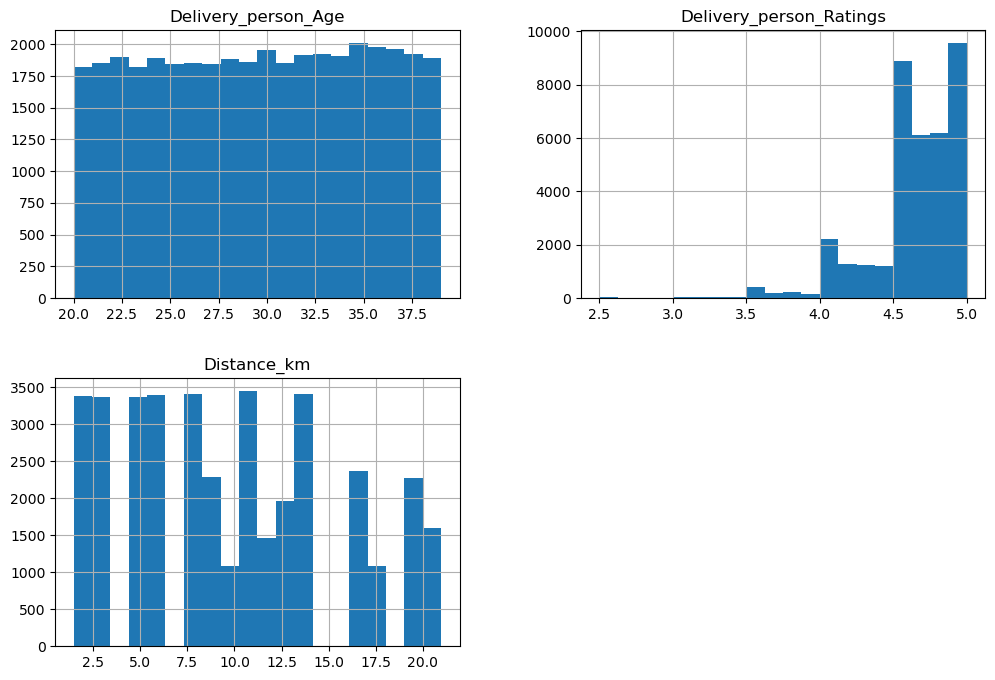

In [835]:
data[['Delivery_person_Age','Delivery_person_Ratings','Distance_km']].hist(bins=20,figsize=(12,8))

In [836]:
from scipy import stats

In [837]:
# col='City'
# var_l_encode=l_encoder.fit_transform(data[col])
# # ANOVA test
# columns=['Weatherconditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City','delivery_state']
# f,p=stats.f_oneway(data['Time_taken(min)'], var_l_encode)
# p

In [839]:
data.to_csv('del.csv')

In [707]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Initialize LabelEncoder
l_encoder = LabelEncoder()

# Columns for ANOVA test
anova_columns = ['Weatherconditions','Festival', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle','multiple_deliveries','City']

# Function to perform ANOVA and return results
def perform_anova(data, dependent_var, independent_var):
    groups = data[independent_var].unique()
    args = [data[data[independent_var] == group][dependent_var] for group in groups]
    f_stat, p_value = stats.f_oneway(*args)
    return f_stat, p_value

# Performing ANOVA for each column and storing results
anova_results = {}
for col in anova_columns:
    # Encoding the categorical variables
    data[col] = l_encoder.fit_transform(data[col])
    # Perform ANOVA
    f_stat, p_value = perform_anova(data, 'Time_taken(min)', col)
    anova_results[col] = (f_stat, p_value)

anova_results

{'Weatherconditions': (508.3640106238836, 0.0),
 'Festival': (3498.774517426568, 0.0),
 'Road_traffic_density': (2886.325655474176, 0.0),
 'Vehicle_condition': (1625.5147103125475, 0.0),
 'Type_of_order': (1.6223736486779194, 0.18180900384140544),
 'Type_of_vehicle': (519.5961082330194, 2.408879028067972e-223),
 'multiple_deliveries': (2907.202015359625, 0.0),
 'City': (1159.1638633946197, 0.0)}

In [904]:
data[['Delivery_person_Age','Delivery_person_Ratings','Distance_km','Time_taken(min)']].corr()

,Delivery_person_Age,Delivery_person_Ratings,Distance_km,Time_taken(min)
Delivery_person_Age,1.000000,-0.115864,-0.002306,0.296767
Delivery_person_Ratings,-0.115864,1.000000,-0.108671,-0.361981
Distance_km,-0.002306,-0.108671,1.000000,0.321904
Time_taken(min),0.296767,-0.361981,0.321904,1.000000


In [905]:
data[['Delivery_person_Age','Delivery_person_Ratings','Distance_km','Time_taken(min)']].corr(method='spearman')

,Delivery_person_Age,Delivery_person_Ratings,Distance_km,Time_taken(min)
Delivery_person_Age,1.000000,-0.104303,-0.002772,0.305757
Delivery_person_Ratings,-0.104303,1.000000,-0.070973,-0.299964
Distance_km,-0.002772,-0.070973,1.000000,0.321292
Time_taken(min),0.305757,-0.299964,0.321292,1.000000


### Data Preparation & encoding

In [708]:
# Label encoding
data=pd.get_dummies(data, columns=['Weatherconditions','Road_traffic_density','Vehicle_condition','Type_of_vehicle','multiple_deliveries','Festival','City'])

In [710]:
data.drop(['Type_of_order','Weatherconditions_5','Road_traffic_density_0','Vehicle_condition_0','Type_of_vehicle_0','multiple_deliveries_1','City_0','Weekend','Festival_0'],axis=1,inplace=True,errors='ignore')

In [713]:
from sklearn.model_selection import train_test_split

In [745]:
X=data.drop('Time_taken(min)',axis=1)
y=data[['Time_taken(min)']]
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [741]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [751]:
y_train=y_train['Time_taken(min)']
y_test=y_test['Time_taken(min)']

In [752]:
# y_train=np.array(y_train)
y_train=pd.to_numeric(y_train,errors='coerce')

In [753]:
len(x_train_scaled),len(y_train)

(30309, 30309)

### PCA

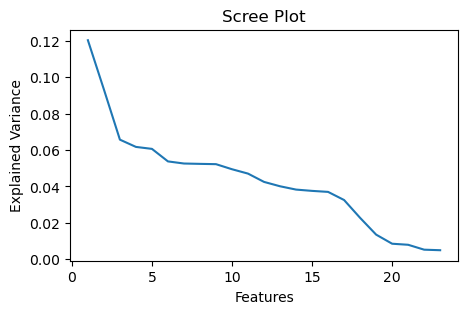

In [801]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
x_train_scaled=std_scaler.fit_transform(x_train_scaled)

pca=PCA()
x_pca=pca.fit_transform(x_train_scaled)
explained_variance=pca.explained_variance_ratio_

plt.figure(figsize=(5,3))
plt.plot(range(1,len(explained_variance)+1),explained_variance)
plt.title('Scree Plot')
plt.xlabel('Features')
plt.ylabel('Explained Variance')
plt.show()

In [803]:
pca=PCA(n_components=19)
X_train_pca=pca.fit_transform(x_train_scaled)
X_test_pca=pca.transform(x_test_scaled)

### Modeling

In [754]:
# !pip install xgboost

In [755]:
import xgboost as xgb

In [756]:
model=xgb.XGBRegressor()

In [757]:
model.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [760]:
len(x_test_scaled),len(y_test)

(7578, 7578)

In [761]:
y_pred=model.predict(x_test_scaled)

In [806]:
model.fit(X_train_pca,y_train)
y_pred_pca=model.predict(X_test_pca)

In [779]:
y_test = y_test.apply(pd.to_numeric, errors='coerce')

9.271098630918287

In [807]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
nrmse=rmse/np.std(y_test)
print(f"N-RMSE: {nrmse}")

MAE: 7.743314811377325
MAPE: 0.3477035336751204
MSE: 92.29522564320322
RMSE: 9.60704042060838
N-RMSE: 1.036235380839306


In [808]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

print(f"MAE: {mean_absolute_error(y_test,y_pred_pca)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test,y_pred_pca)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_pca)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred_pca))}")
rmse=np.sqrt(mean_squared_error(y_test,y_pred_pca))
nrmse=rmse/np.std(y_test)
print(f"N-RMSE: {nrmse}")

MAE: 7.604751026388144
MAPE: 0.35040657474161374
MSE: 87.41381636586223
RMSE: 9.349535623006217
N-RMSE: 1.008460377266007


In [907]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)  # Alpha is a hyperparameter that controls regularization strength

# Fit the model to the training data
lasso.fit(x_train_scaled, y_train)

# Make predictions
y_pred = lasso.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
nrmse=rmse/np.std(y_test)
print(f"N-RMSE: {nrmse}")

MAE: 7.49552111274459
MAPE: 0.3390360960902373
MSE: 85.97166175614768
RMSE: 9.272090473897872
N-RMSE: 1.000106982248714


### Random Forest

In [908]:
from sklearn.ensemble import RandomForestRegressor

In [909]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train_scaled,y_train)
y_pred=rf.predict(x_test_scaled)

In [910]:
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
nrmse=rmse/np.std(y_test)
print(f"N-RMSE: {nrmse}")

MAE: 7.6392385853787275
MAPE: 0.34482436689174756
MSE: 89.33055332541568
RMSE: 9.451484186381295
N-RMSE: 1.0194567615602146


In [911]:
# PCA
model.fit(X_train_pca,y_train)
y_pred_pca=model.predict(X_test_pca)

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

print(f"MAE: {mean_absolute_error(y_test,y_pred_pca)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test,y_pred_pca)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_pca)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred_pca))}")
rmse=np.sqrt(mean_squared_error(y_test,y_pred_pca))
nrmse=rmse/np.std(y_test)
print(f"N-RMSE: {nrmse}")

MAE: 7.604751026388144
MAPE: 0.35040657474161374
MSE: 87.41381636586223
RMSE: 9.349535623006217
N-RMSE: 1.008460377266007


### Saving the model as pickle file

In [809]:
import pickle

In [810]:
with open('model.pkl','wb') as model_file:
    pickle.dump(model,model_file)

In [811]:
with open('scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)